In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
marketing = pd.read_csv('marketing_training.csv')

In [3]:
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [4]:
marketing.shape

(7414, 22)

In [5]:
print('Number of training examples: {0}'.format(marketing.shape[0]))
print('Number of features for each example: {0}'.format(marketing.shape[1]))

Number of training examples: 7414
Number of features for each example: 22


In [6]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
custAge           5610 non-null float64
profession        7414 non-null object
marital           7414 non-null object
schooling         5259 non-null object
default           7414 non-null object
housing           7414 non-null object
loan              7414 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
dtypes: float64(7), int64(4), ob

In [7]:
#List of columns
pd.DataFrame(data = {'Feature Label': marketing.columns})

,Feature Label
0,custAge
1,profession
2,marital
3,schooling
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


# Visualizing Missing values

In [9]:
import missingno as msno 

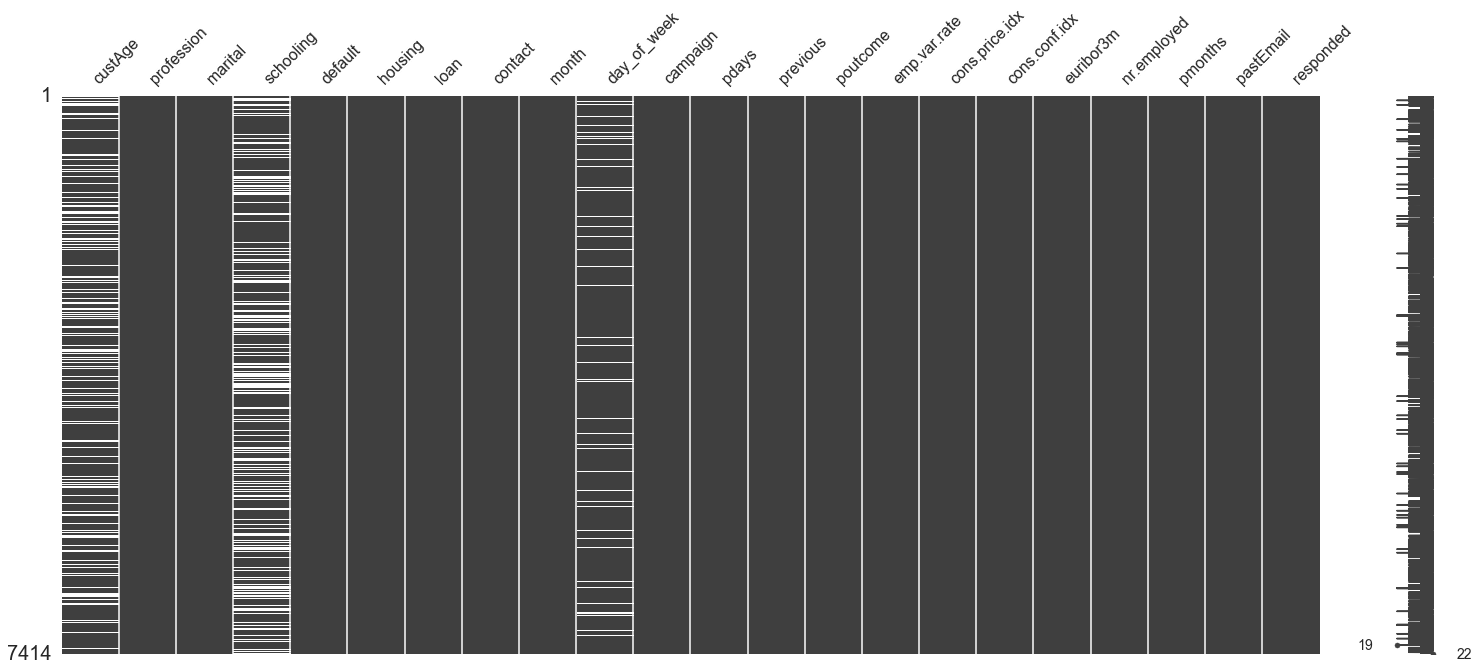

In [10]:
msno.matrix(marketing) 

We can see that there is pattern of missing values in custAge, schooling, day_of_week

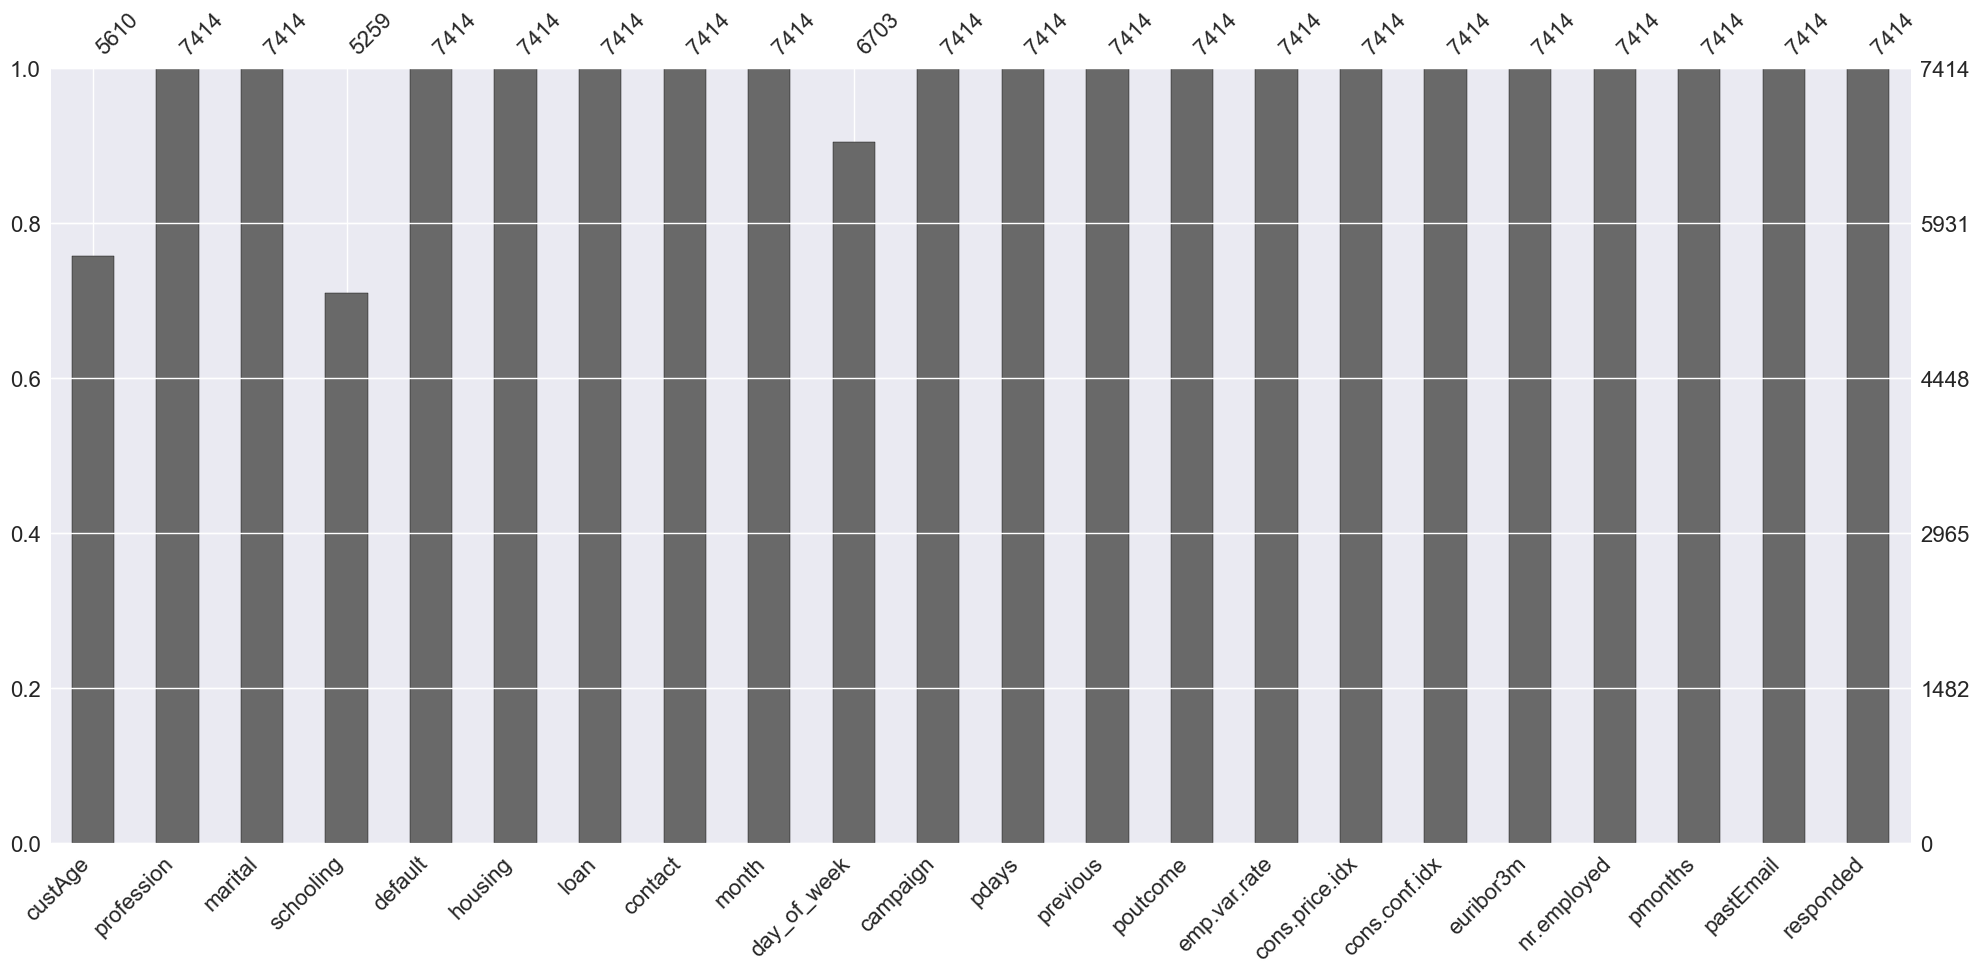

In [11]:
msno.bar(marketing) 

There are three columns that have missing values: custAge, schooling, day_of_week

# Data Exploration

In [14]:
# for generation of interactive data visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
labels = ["no", "yes"]
values = marketing["responded"].value_counts().values

trace = go.Pie(labels = labels, values = values)
layout = go.Layout(title = 'Distribution of Target Variable - Responded')

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

As we can see, the target variable is highly skewed, with only 11.3% of responded said yes. This is something that we will have to keep in mind when evaluating the results of our predictions later on.

We should also get some information on the categorical variables in this dataset. We can do this by subsetting the categorical feature columns.

In [15]:
marketing.select_dtypes(include=["object_"]).columns

Index(['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'responded'],
      dtype='object')

In [16]:
import numpy as np
df1 = marketing.replace(np.nan, 'missing', regex=True)

In [15]:
list(df1.select_dtypes(include=["object_"]).columns)

['custAge',
 'profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'responded']

In [17]:
for i in list(df1.select_dtypes(include=["object_"]).columns):
    df1[i] =df1[i].astype('category')

In [18]:
df1.select_dtypes(exclude=["number","bool_","object_"])

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
0,55,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,nonexistent,no
1,missing,blue-collar,married,missing,no,no,no,cellular,jul,mon,nonexistent,no
2,42,technician,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
3,55,management,divorced,missing,unknown,yes,yes,cellular,jul,wed,nonexistent,no
4,missing,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33,blue-collar,single,high.school,no,no,no,telephone,may,wed,nonexistent,no
7410,45,blue-collar,married,basic.4y,unknown,no,no,telephone,jul,tue,nonexistent,no
7411,27,blue-collar,single,missing,no,no,no,cellular,may,fri,failure,no
7412,51,unemployed,divorced,high.school,unknown,yes,no,cellular,nov,thu,nonexistent,no


In [19]:
list(df1.select_dtypes(include=["category"]).columns)[0]

'custAge'

In [20]:
df1['custAge'] = df1['custAge'].astype('str')

In [21]:
df1['custAge'][df1.custAge == 'missing'] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df1['custAge'] = df1['custAge'].astype('float')

In [23]:
df1['custAge'][df1.custAge == 0] = df1.custAge.mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df1[list(df1.select_dtypes(include=["category"]).columns)[1]].unique()

[single, married, divorced, unknown]
Categories (4, object): [single, married, divorced, unknown]

In [24]:
for i in df1.select_dtypes(include=["category"]).columns:
    print("Categories in column " + str(i) + str(df1[i].unique()))
    print('')

Categories in column profession[admin., blue-collar, technician, management, services, ..., unknown, self-employed, retired, student, entrepreneur]
Length: 12
Categories (12, object): [admin., blue-collar, technician, management, ..., self-employed, retired, student, entrepreneur]

Categories in column marital[single, married, divorced, unknown]
Categories (4, object): [single, married, divorced, unknown]

Categories in column schooling[university.degree, missing, high.school, basic.4y, basic.9y, professional.course, basic.6y, unknown, illiterate]
Categories (9, object): [university.degree, missing, high.school, basic.4y, ..., professional.course, basic.6y, unknown, illiterate]

Categories in column default[unknown, no, yes]
Categories (3, object): [unknown, no, yes]

Categories in column housing[no, yes, unknown]
Categories (3, object): [no, yes, unknown]

Categories in column loan[no, yes, unknown]
Categories (3, object): [no, yes, unknown]

Categories in column contact[cellular, tel

Below is a visualization of the distribution within each categorical feature. The legend on the right shows the labels provided each category.

In [26]:
cat_columns =list(df1.select_dtypes(include=["category"]).columns)
cat_counts = df1[list(df1.select_dtypes(include=["category"]).columns)].apply(pd.value_counts)

trace = []
for i in range(cat_counts.shape[0]):
    trace_temp = go.Bar(
        x= np.asarray(cat_columns),
        y= cat_counts.values[i],
        name = cat_counts.index[i]
    )
    trace.append(trace_temp)

layout = go.Layout(
    barmode = 'stack',
    title = 'Distribution of Categorical Features'
)

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [27]:
misc_columns = list(df1.select_dtypes(include=["float_"]).columns)
misc_columns

['custAge',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths']

In [28]:
list(df1.select_dtypes(include=["float_"]).columns)[:-2]

['custAge', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [29]:
#create boxplots for 'ind' columns
ind_columns = list(df1.select_dtypes(include=["float_"]).columns)[:-2]
trace1 = []
for i in range(len(ind_columns)):
    trace_temp = go.Box(
        y= df1[ind_columns[i]],
        name = ind_columns[i]
    )

    trace1.append(trace_temp)

layout1 = go.Layout(
    title = 'Distribution of "numerical" Features'
)
fig1 = go.Figure(data = trace1, layout = layout1)
iplot(fig1)

We can see from the distributions above that while some features have relatively small ranges while others have relatively larger ranges, it may be useful to consider normalization in order to improve the performance of our chosen model when it comes time to optimize our predictions.



In [43]:
## Analyzing target variable

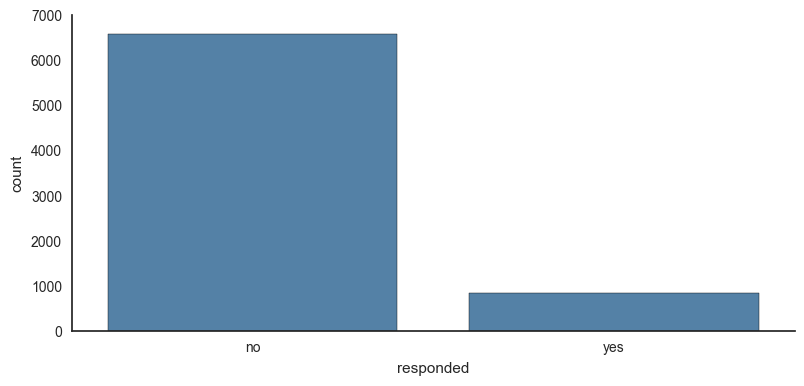

In [44]:
with sns.axes_style('white'):
    g = sns.factorplot("responded", data=df1, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

It is clear that the dataset is imbalanced

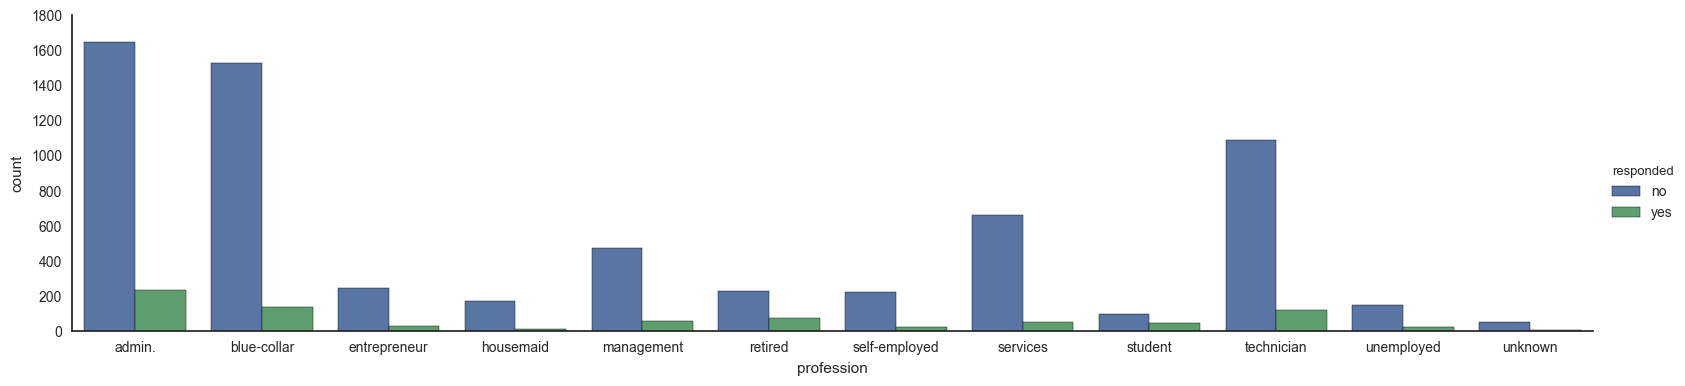

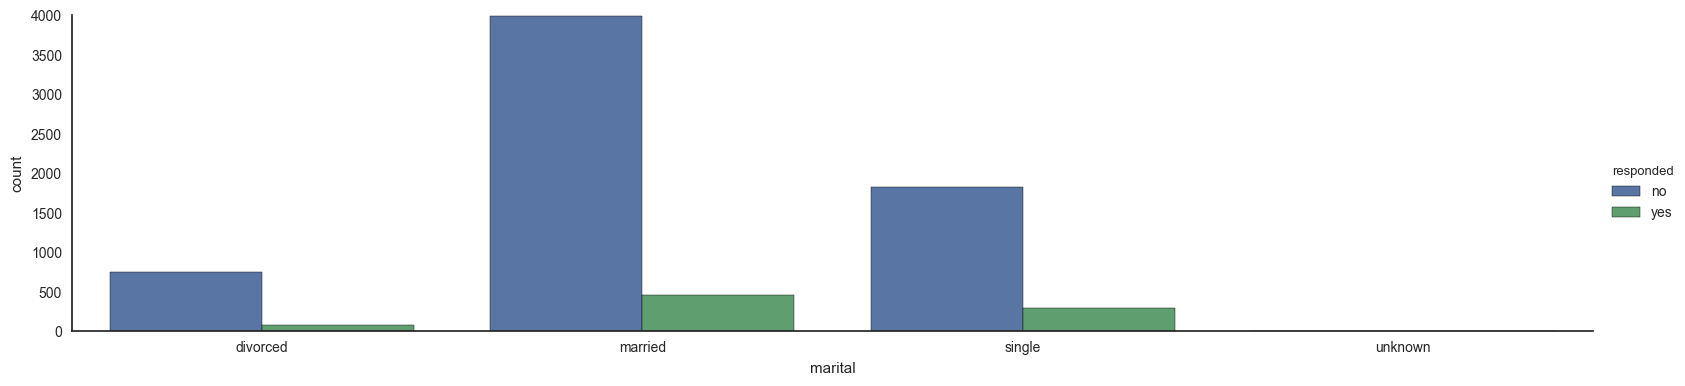

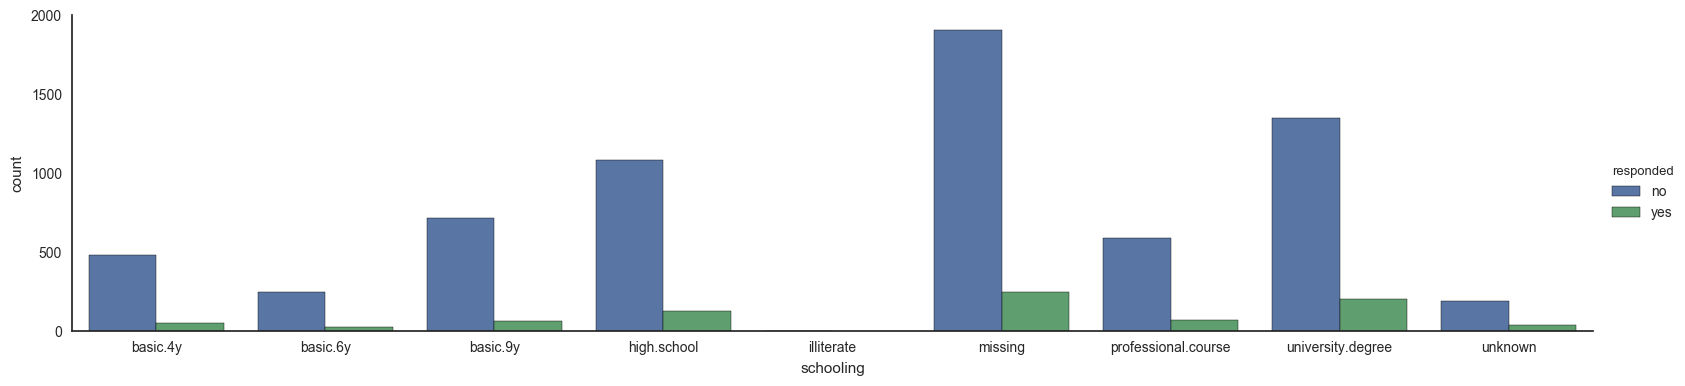

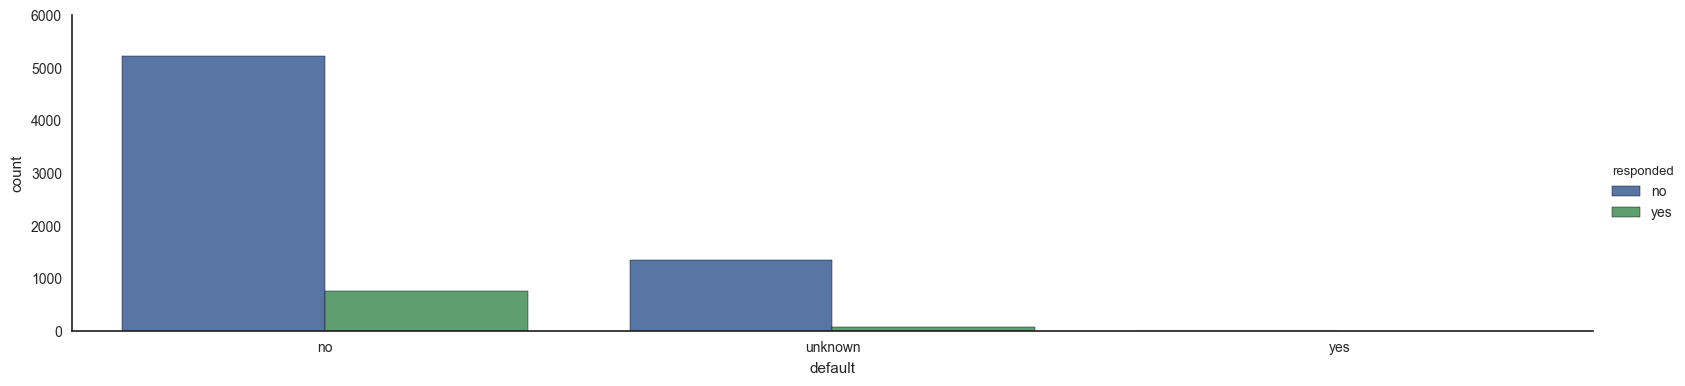

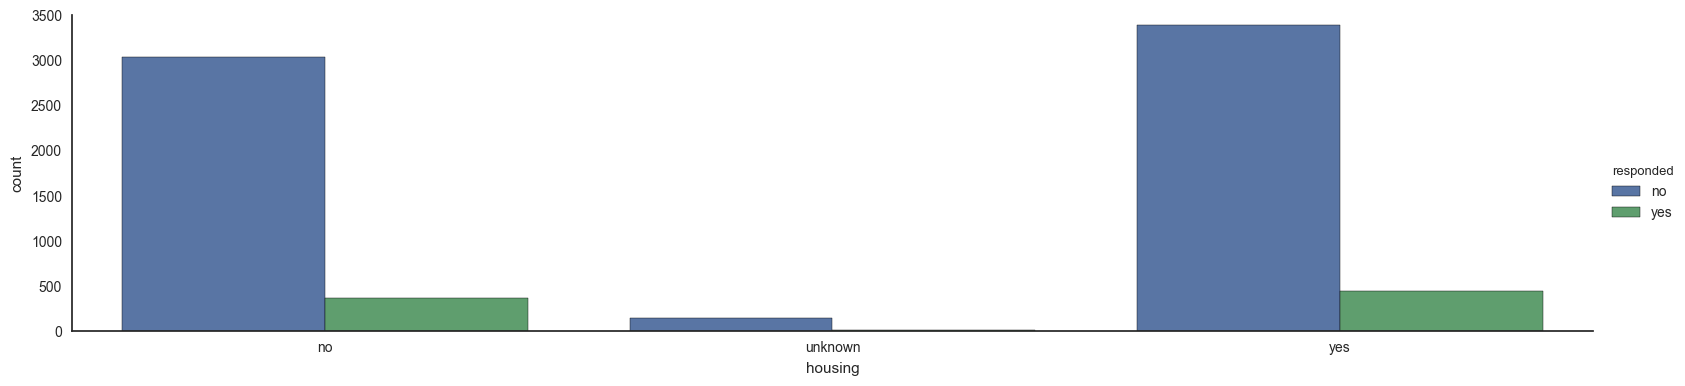

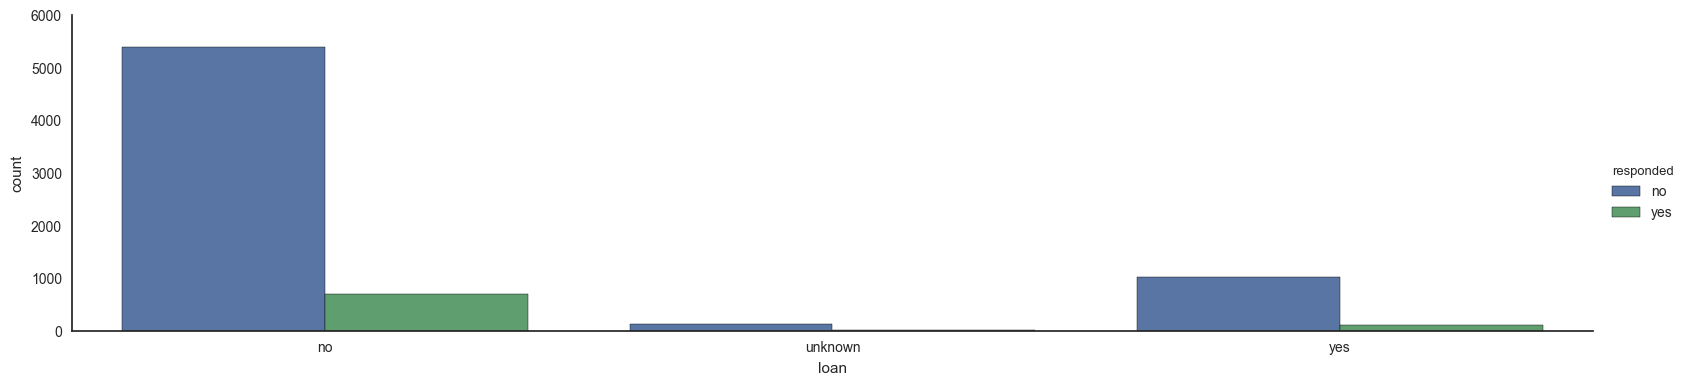

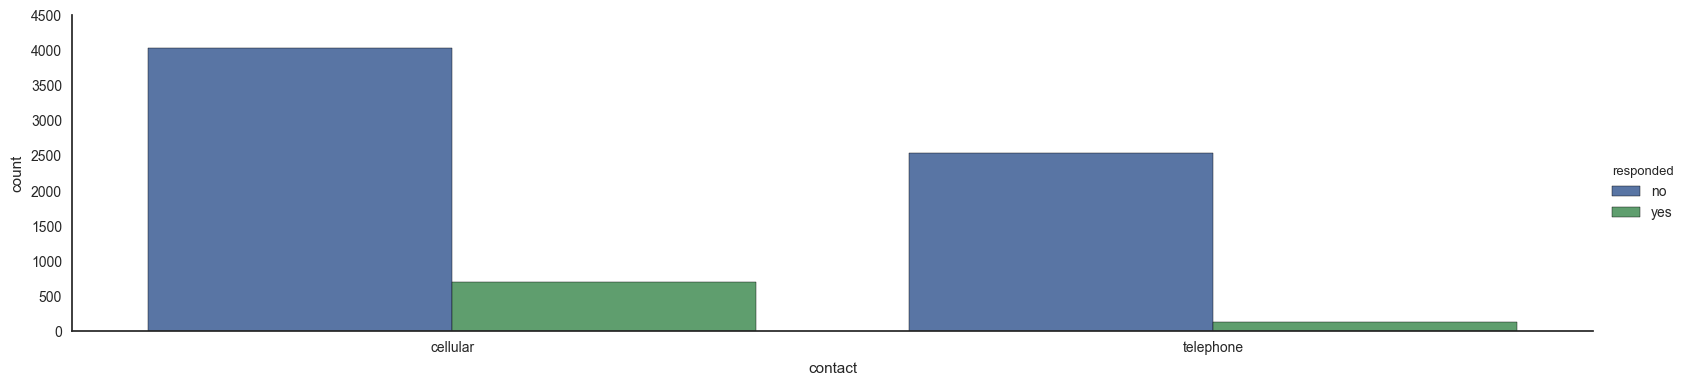

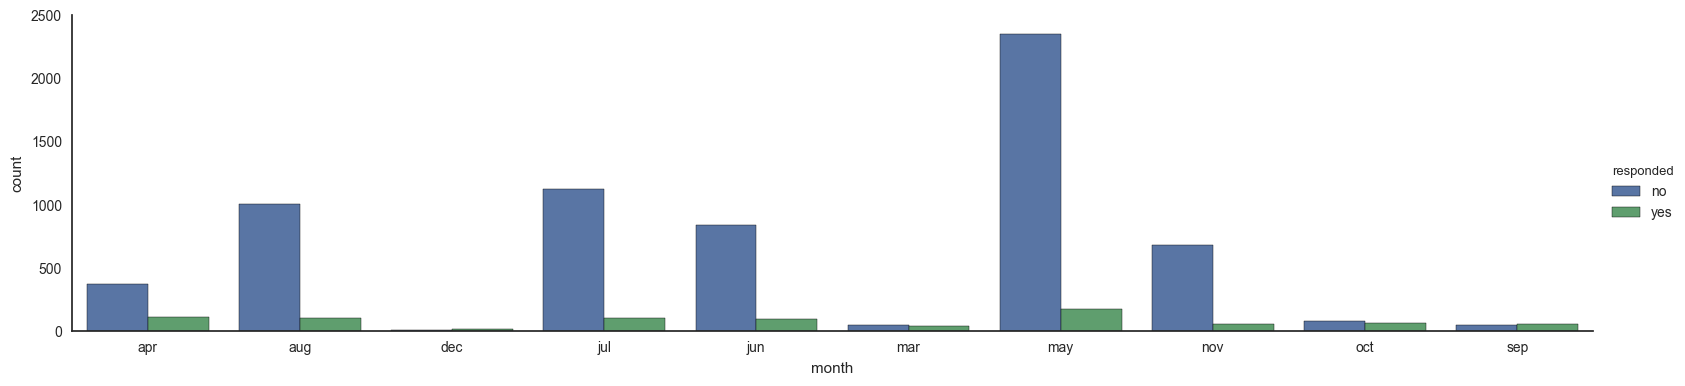

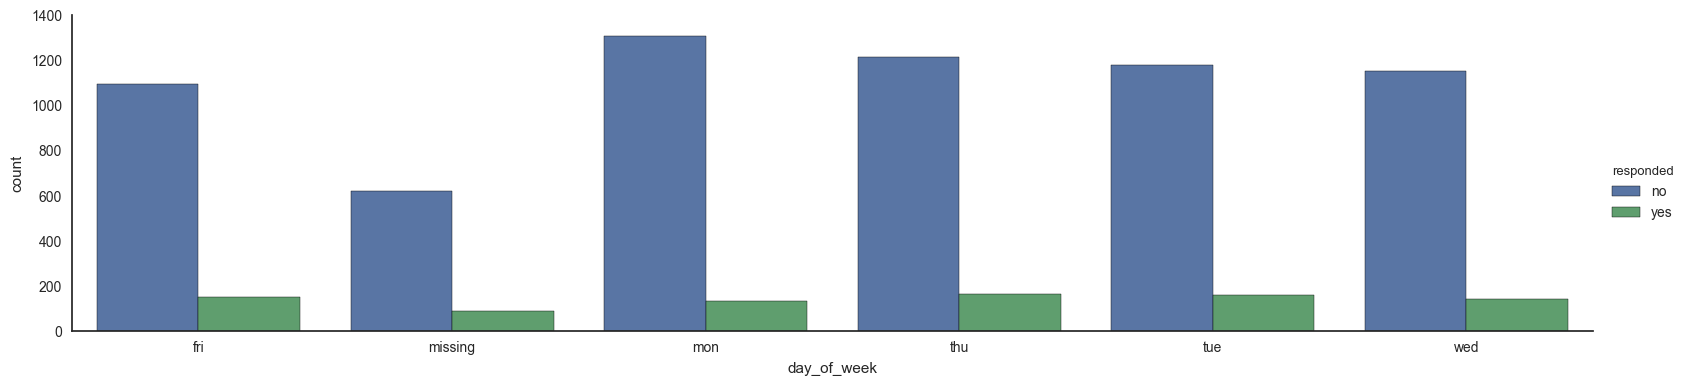

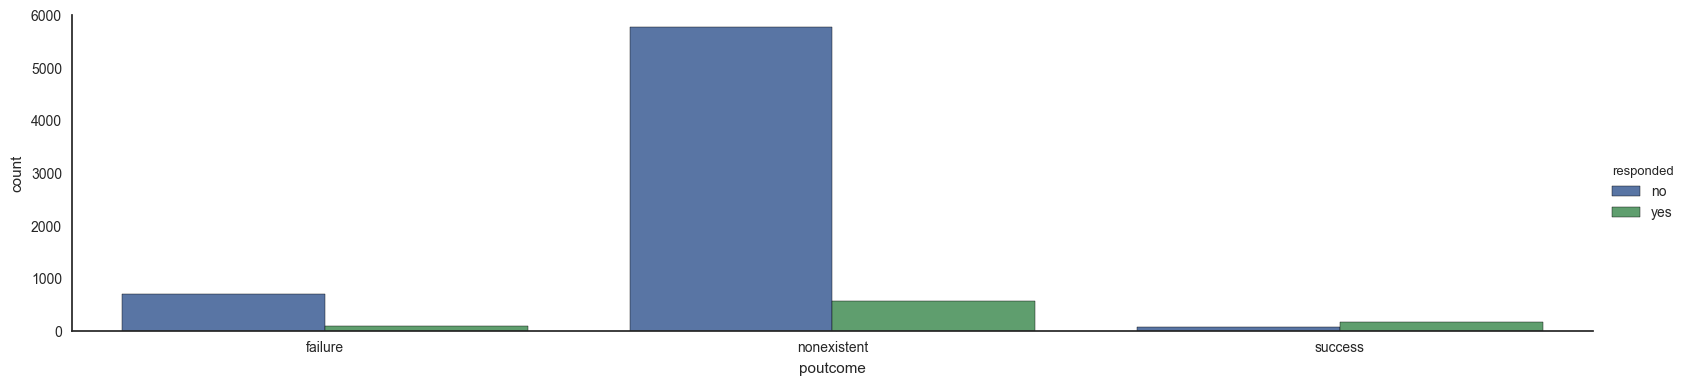

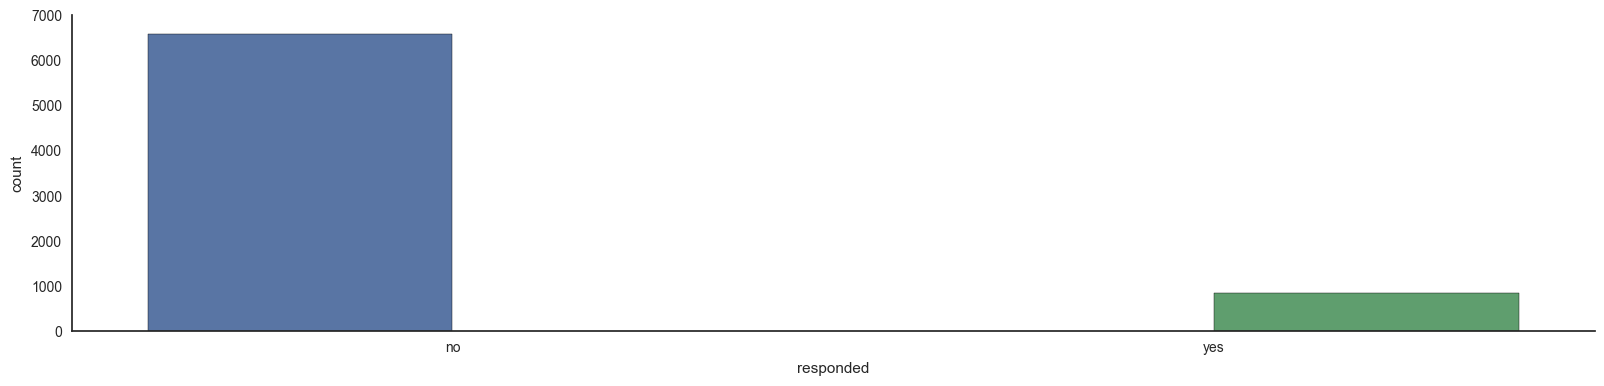

In [47]:
for i in list(df1.select_dtypes(include=["category"]).columns):
    with sns.axes_style('white'):
        g = sns.factorplot(i, data=df1, aspect=4.0, kind='count',
                       hue='responded')
        g.set_xticklabels(step=1)

The dataset imbalance so there not a strong finding.But the people who said yes seems to have following traits:
1. They are in high profile jobs
2. Attained high education
3. Do not have loan

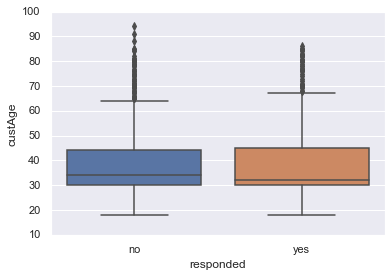

In [30]:
ax = sns.boxplot(x="responded", y="custAge", data=df1)

In [31]:
list(df1.select_dtypes(include=["float_"]).columns)[:-2]

['custAge', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

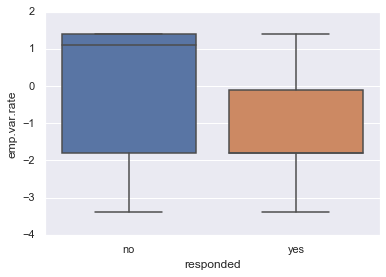

In [32]:
ax = sns.boxplot(x="responded", y='emp.var.rate', data=df1)

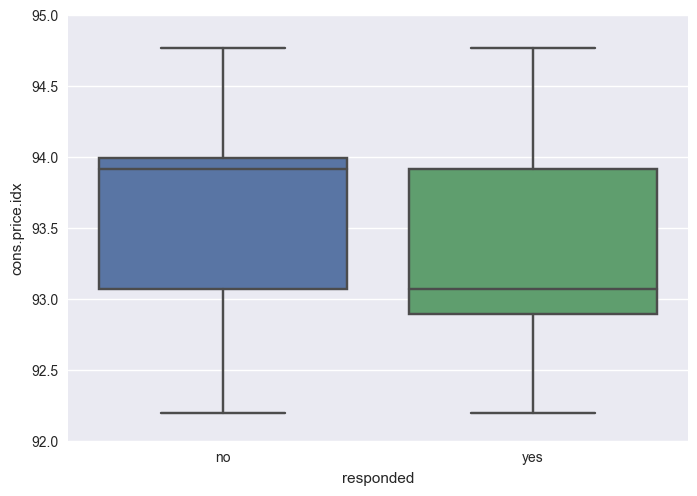

In [55]:
ax = sns.boxplot(x="responded", y='cons.price.idx', data=df1)

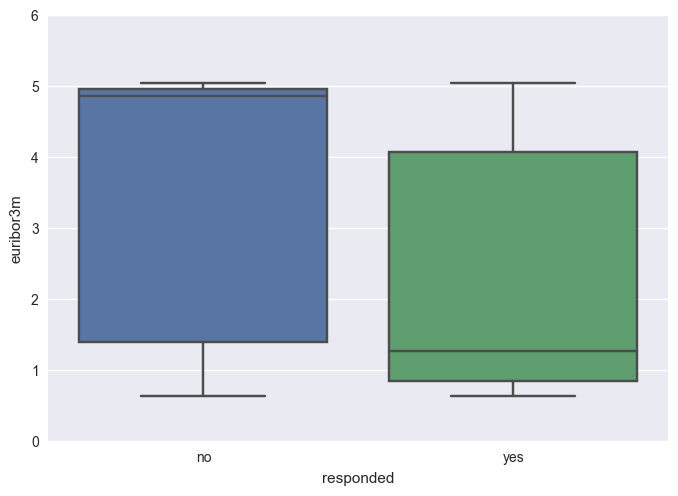

In [56]:
ax = sns.boxplot(x="responded", y='euribor3m', data=df1)